In [2]:
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import torch 
from torchmetrics import F1Score
import torchvision
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torchvision
from torchvision.transforms import Resize
import helper
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shutil
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
import os
from torch.utils.data import RandomSampler, DataLoader, Subset, SubsetRandomSampler, RandomSampler


from Net import *
from Model import *
from PlanktonLoader import *
from tool_box import *

%load_ext autoreload
%autoreload 2

In [3]:
# pre-processing
data_folder = '../ZooScanSet'
# data_folder = '/Users/nounou/Desktop/EPFL/M5/Project I/Code/ZooScanSet'
image_size = (128,128)
normalize = ((0.5), (0.5))
unwanted_classes = ['seaweed','badfocus__Copepoda','artefact','badfocus__artefact','bubble','detritus','fiber__detritus','egg__other','multiple__other']
transform = transforms.Compose([transforms.Resize(image_size),transforms.ToTensor(), transforms.Normalize(*normalize)])

dataset = PlanktonLoader(data_folder+'/taxa.csv', data_folder+"/imgs/", unwanted_classes ,transform)

#sampling and train-test split
sampling_factor = .1
train_factor = .8
shuffle = True
random_seed= 42
batch_size = 16

trainloader_dataset, testloader_dataset = PlanktonLoader.build_loaders(dataset, sampling_factor, train_factor, batch_size, random_seed= 41, shuffle_dataset= True)


 The id list has a lenght of  703821
oops identation broken, the following differs between the list of directories and the class list
[]
['.DS_Store']
We have  84 classes
We use  0.1 of the data ( 70382 samples) and the train factor is  0.8
Train set contains 56305 images.
Test set contains 14077 images.


<generator object Module.parameters at 0x175b30890>
Epoch [0], train_loss: 1.9144, val_loss: 1.7410, val_acc: 0.5261,  val_f1_score: 0.5261
Epoch [1], train_loss: 1.4882, val_loss: 1.6896, val_acc: 0.5523,  val_f1_score: 0.5523
Epoch [2], train_loss: 1.2461, val_loss: 1.6991, val_acc: 0.5602,  val_f1_score: 0.5602
Epoch [3], train_loss: 1.0550, val_loss: 1.8584, val_acc: 0.5685,  val_f1_score: 0.5685
Epoch [4], train_loss: 0.8992, val_loss: 2.0740, val_acc: 0.5586,  val_f1_score: 0.5586
Epoch [5], train_loss: 0.7716, val_loss: 2.2233, val_acc: 0.5671,  val_f1_score: 0.5671
Epoch [6], train_loss: 0.6579, val_loss: 2.4725, val_acc: 0.5639,  val_f1_score: 0.5639
Epoch [7], train_loss: 0.5695, val_loss: 2.6942, val_acc: 0.5664,  val_f1_score: 0.5664


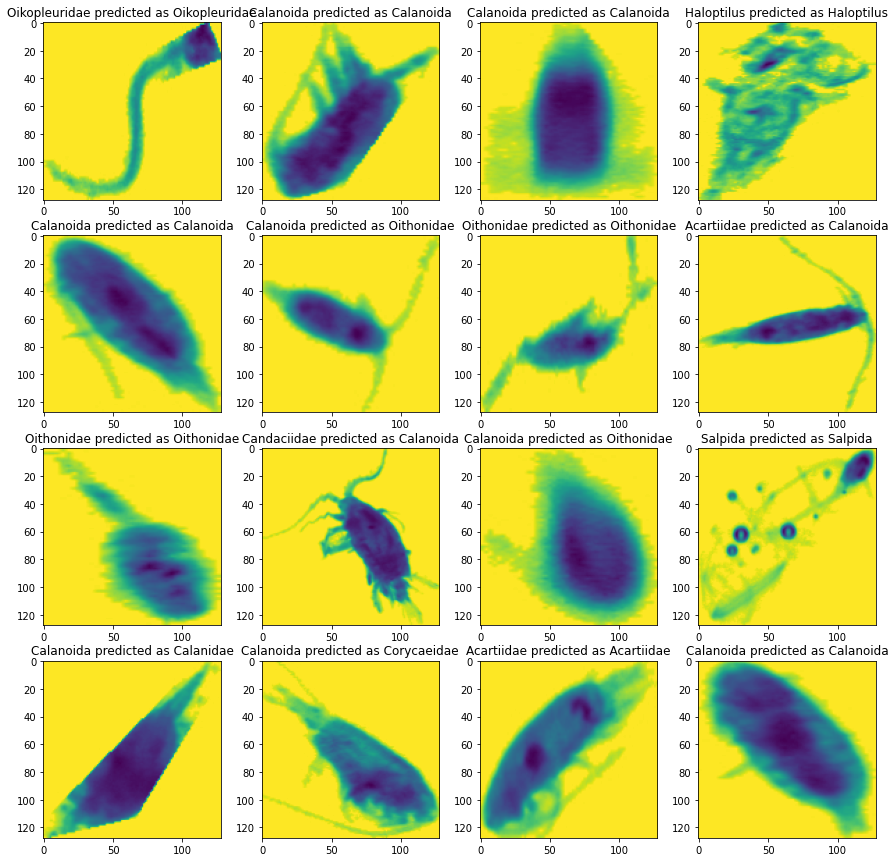

10 good predictions. Accuracy :  0.625


In [16]:
num_epochs = 8
lr = 0.001
opt_func = torch.optim.Adam
net = Net()
net.initialize_weights()
model = ImageClassificationBase()

history = ImageClassificationBase.fit(model, num_epochs, lr, net, trainloader_dataset, testloader_dataset, opt_func)
torch.save(net.state_dict(), data_folder+'/last_model.pth')
Plot.plot_random_output(testloader_dataset, dataset, net)


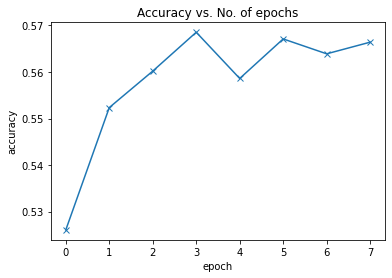

In [17]:
Plot.plot_accuracies(history)

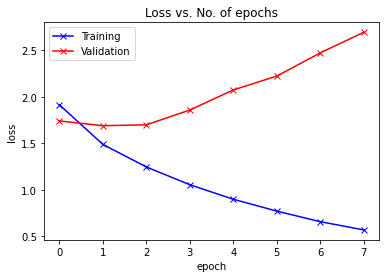

In [18]:
Plot.plot_losses(history)


In [19]:
df = Plot.class_accuracies(Plot, net, dataset, testloader_dataset)


Class # 0   Neoceratium trained on 176 times -> accuracy : 0.5625
Class # 1   Noctiluca trained on 1888 times -> accuracy : 0.5640889830508474
Class # 2   Phaeodaria trained on 4272 times -> accuracy : 0.5889513108614233
Class # 3   Acantharea trained on 240 times -> accuracy : 0.5541666666666667
Class # 4   Foraminifera trained on 2016 times -> accuracy : 0.5590277777777778
Class # 5   Spumellaria trained on 16 times -> accuracy : 0.5625
Class # 6   Coscinodiscus trained on 3728 times -> accuracy : 0.5853004291845494
Class # 7   Annelida trained on 704 times -> accuracy : 0.5241477272727273
Class # 8   larvae__Annelida trained on 64 times -> accuracy : 0.546875
Class # 9   Tomopteridae trained on 64 times -> accuracy : 0.546875
Class # 10   Evadne trained on 5456 times -> accuracy : 0.5518695014662757
Class # 11   Podon trained on 448 times -> accuracy : 0.5267857142857143
Class # 12   Penilia trained on 1920 times -> accuracy : 0.5296875
Class # 13   larvae__Crustacea trained on 208 

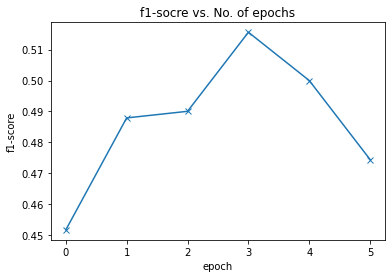

In [11]:
Plot.plot_f1(history)